In [22]:
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers, models
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Define the data directories

In [2]:
train_dir = '/content/drive/MyDrive/Machine_Learning/Task1/train'
test_dir = '/content/drive/MyDrive/Machine_Learning/Task1/test'
val_dir = '/content/drive/MyDrive/Machine_Learning/Task1/val'

# Define image size and batch size

In [3]:
img_size = (224, 224)
batch_size = 16
epochs = 10

# Create data generators with data augmentation for training set

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data generator for test and validation sets

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directories and apply data augmentation

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # Adjust this based on your problem
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # Adjust this based on your problem
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # Adjust this based on your problem
)

Found 5229 images belonging to 2 classes.
Found 634 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


#Loading Images

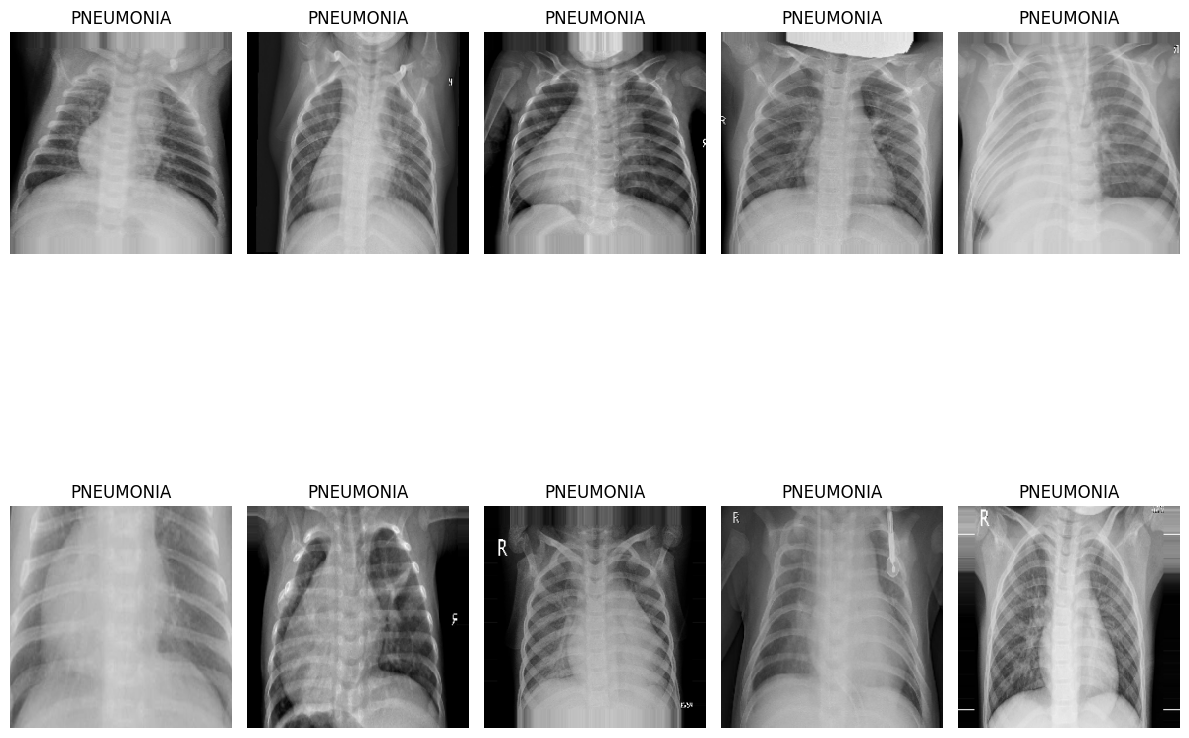

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 12))

for i in range(10):
    X_batch, Y_batch = next(train_generator)

    image = X_batch[0]

    label = 'NORMAL' if Y_batch[0] == 0 else 'PNEUMONIA'

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.axis('off')
    plt.imshow(np.squeeze(image), cmap='gray', interpolation='nearest')

plt.tight_layout()
plt.show()


# Build a simple CNN model

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Adjust the number of output nodes based on your problem

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Adjust the loss function based on your problem
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

# Train the model

In [9]:
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=10,
                    verbose=1)

Epoch 1/10
327/327 [==============================] - ETA: 0s - loss: 0.3472 - accuracy: 0.8436

327/327 [==============================] - 2147s 7s/step - loss: 0.3472 - accuracy: 0.8436 - val_loss: 0.5123 - val_accuracy: 0.8125
Epoch 2/10
327/327 [==============================] - 128s 392ms/step - loss: 0.2379 - accuracy: 0.9019
Epoch 3/10
327/327 [==============================] - 125s 384ms/step - loss: 0.1744 - accuracy: 0.9306
Epoch 4/10
327/327 [==============================] - 126s 385ms/step - loss: 0.1668 - accuracy: 0.9380
Epoch 5/10
327/327 [==============================] - 125s 383ms/step - loss: 0.1526 - accuracy: 0.9378
Epoch 6/10
327/327 [==============================] - 127s 389ms/step - loss: 0.1566 - accuracy: 0.9390
Epoch 7/10
327/327 [==============================] - 129s 394ms/step - loss: 0.1391 - accuracy: 0.9466
Epoch 8/10
327/327 [==============================] - 127s 390ms/step - loss: 0.1342 - accuracy: 0.9497
Epoch 9/10
327/327 [==============================] - 125s 382ms/step - loss: 0.1340 - accuracy: 0.9489
Epoch 10/10
327/327 [==============

# Evaluate the model on the test set

In [10]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc}')

39/39 [==============================] - 327s 9s/step - loss: 0.3241 - accuracy: 0.8846
Test accuracy: 0.8846153616905212


# Plot training and validation accuracy

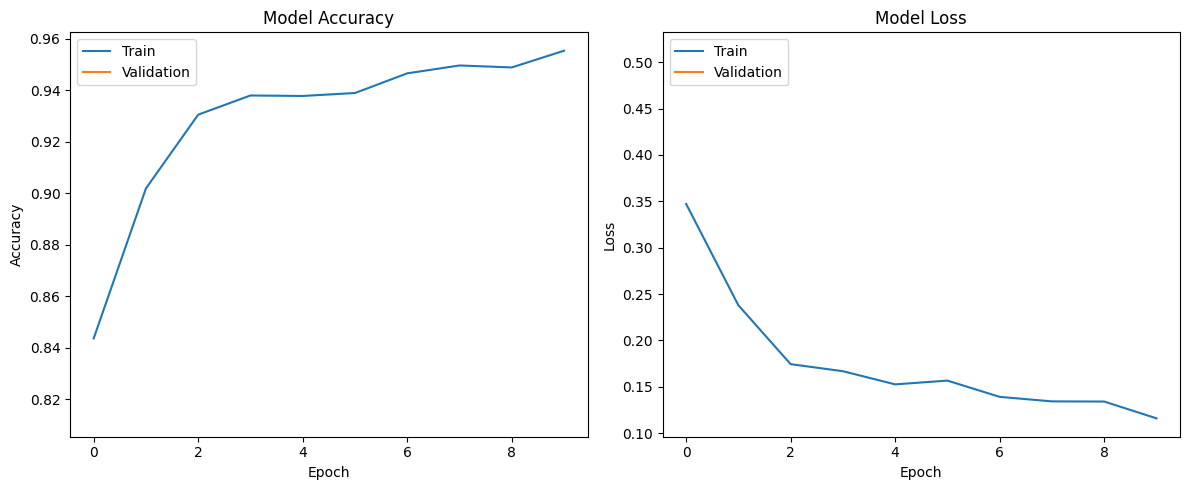

In [20]:
def plot_curves(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_curves(history)